<a href="https://colab.research.google.com/github/olaidekashimawo/Pima-Indian-Diabetic-Prediction/blob/main/Pima_Indians_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business understanding & Problem framing
    This project focuses on predicting whether an individual is at risk of developing diabetes using demographic and health-related data.
    It applies classification models to assist healthcare providers in early detection and prevention strategies.

## Objectives
    Develop a machine learning model to classify diabetes risk.

	*	Identify key health features associated with diabetes.
	*	Evaluate model performance with metrics relevant to healthcare (e.g., recall, ROC-AUC).
	*	Provide model interpretability using SHAP values.

## Dataset

    Source: Pima Indians Diabetes Database

	* 768 patient records
	* Features: Glucose level, BMI, Age, Blood Pressure, Pregnancies, Insulin, Skin Thickness
	* Target: Outcome (1 = Diabetes, 0 = No Diabetes)

## Technologies Used

	*	Python (Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn)
	*	SHAP (for model explainability)
	*	Jupyter Notebook
	*	Git/GitHub

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Data columns (total 9 columns)

##  Data Exploration

In [4]:
# Missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


No null or misisng values

In [5]:
# Iterate through all columns and print value counts
for col in df.columns:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")


Value counts for Pregnancies:
Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

Value counts for Glucose:
Glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64

Value counts for BloodPressure:
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64

Value counts for SkinThickness:
Sk

In [6]:
# distribution of classes

import matplotlib.pyplot as plt
# Class distribution
print(df['Outcome'].value_counts(normalize=True) * 100)

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


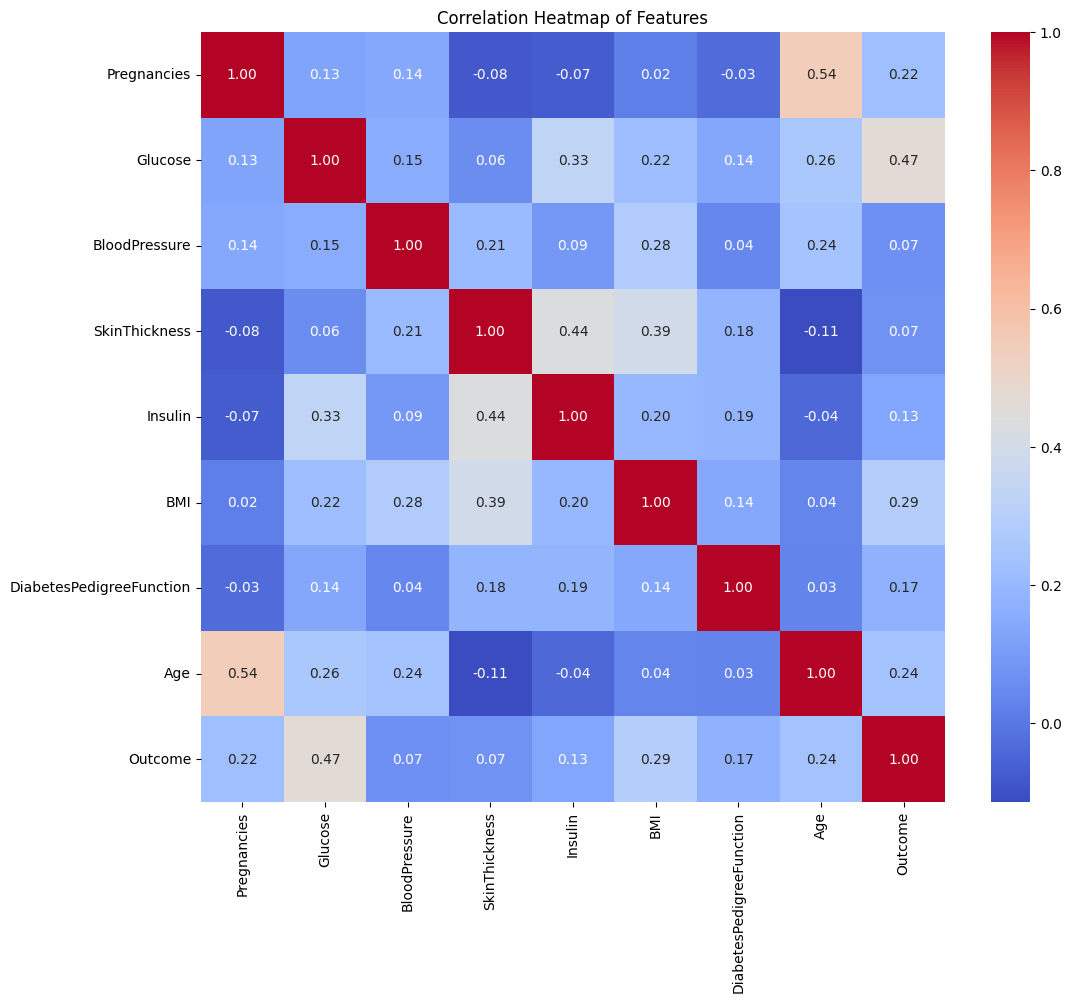

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


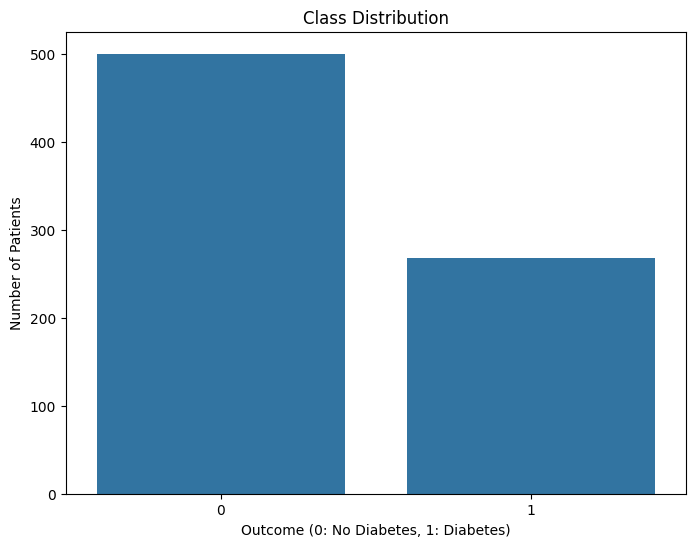

Imbalance Ratio (Positive/Negative): 0.536
Class imbalance is not significant.


In [8]:

# Class imbalance check
class_counts = df['Outcome'].value_counts()
print(class_counts)

# Calculate the percentage of each class
class_percentages = df['Outcome'].value_counts(normalize=True) * 100
print(class_percentages)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Number of Patients')
plt.show()

# Check for significant imbalance
imbalance_ratio = class_counts[1] / class_counts[0]
print(f"Imbalance Ratio (Positive/Negative): {imbalance_ratio}")
if imbalance_ratio < 0.3 or imbalance_ratio > 3:
  print("Significant class imbalance detected.")
else:
  print("Class imbalance is not significant.")


## Data Preprocessing

In [9]:
#	Handling missing values (e.g., 0s in BMI, Glucose)
# Replace 0 values in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' with NaN
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

In [10]:
# Impute missing values using the mean
for col in cols_to_replace:
    df[col] = df[col].fillna(df[col].mean())

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Feature scaling using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [14]:
# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Modeling

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [17]:
# 8. Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# 9. Define hyperparameter grids
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.3]}
}

In [18]:
# 10. Perform GridSearchCV and evaluate models
results = {}

for name, model in models.items():
    print(f"Training {name}...")

    grid_search = GridSearchCV(
        model, param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1
    )
    grid_search.fit(X_train_resampled, y_train_resampled)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    results[name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba)
    }

Training Logistic Regression...
Training Random Forest...
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:07:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [19]:
# 11. Print final results
print("\n--- Model Evaluation Results ---\n")
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Best Hyperparameters: {result['best_params']}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1 Score: {result['f1']:.4f}")
    print(f"ROC-AUC Score: {result['roc_auc']:.4f}")
    print("-" * 40)


--- Model Evaluation Results ---

Model: Logistic Regression
Best Hyperparameters: {'C': 0.1}
Accuracy: 0.7143
Precision: 0.5821
Recall: 0.7091
F1 Score: 0.6393
ROC-AUC Score: 0.8272
----------------------------------------
Model: Random Forest
Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}
Accuracy: 0.7792
Precision: 0.6667
Recall: 0.7636
F1 Score: 0.7119
ROC-AUC Score: 0.8200
----------------------------------------
Model: XGBoost
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Accuracy: 0.6883
Precision: 0.5522
Recall: 0.6727
F1 Score: 0.6066
ROC-AUC Score: 0.7851
----------------------------------------


## Insights & Result

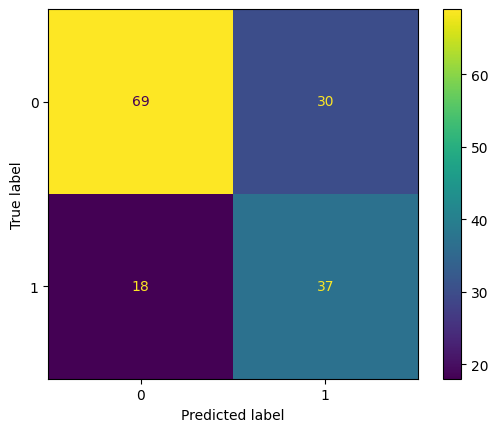

In [20]:
#visualize confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:10:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


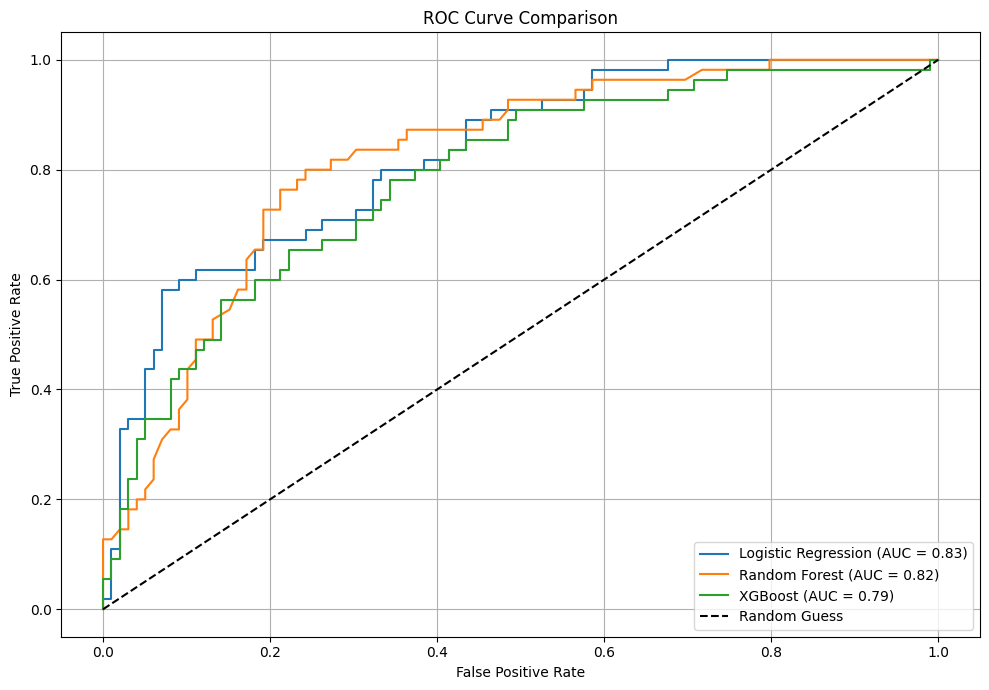

In [21]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

for name, model in models.items():
    best_model = model
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_model = grid_search.best_estimator_
    y_proba = best_model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

##SHAP Explainability (for XGBoost)
    SHAP helps explain feature contributions, which is critical for healthcare applications.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:13:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


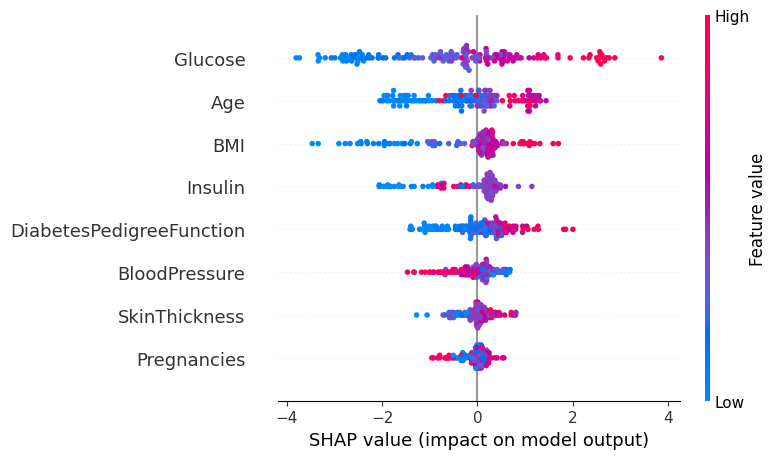

In [22]:
import shap

# Fit XGBoost again on original training set (optional: skip if already trained)
xgb_model = XGBClassifier(**results['XGBoost']['best_params'], random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# SHAP analysis
explainer = shap.Explainer(xgb_model, X_train_resampled)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=df.drop('Outcome', axis=1).columns)

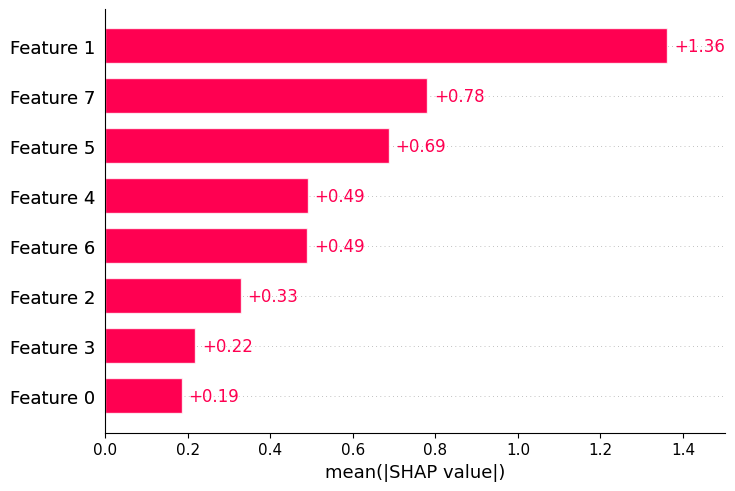

In [23]:
shap.plots.bar(shap_values)

Summary Table

In [24]:
import pandas as pd

summary_df = pd.DataFrame(results).T
summary_df = summary_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']]  # Reorder columns
summary_df.to_csv("model_comparison_results.csv", index=True)